In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("diet_recommendations_dataset.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1000, 20)


,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [ ]:
df = df.dropna()
print("After removing missing values:", df.shape)

After removing missing values: (365, 20)


In [ ]:
categorical_cols = [
    "Gender",
    "Disease_Type",
    "Severity",
    "Physical_Activity_Level",
    "Dietary_Restrictions",
    "Allergies",
    "Preferred_Cuisine"
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)   # VERY IMPORTANT
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
diet_encoder = LabelEncoder()
df["Diet_Recommendation"] = diet_encoder.fit_transform(df["Diet_Recommendation"])

In [ ]:
X = df.drop("Diet_Recommendation", axis=1)
y = df["Diet_Recommendation"]

In [ ]:

if "Patient_ID" in df.columns:
    df = df.drop("Patient_ID", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print(X.dtypes)

Patient_ID                           object
Age                                   int64
Gender                                int64
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                          int64
Severity                              int64
Physical_Activity_Level               int64
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                  int64
Allergies                             int64
Preferred_Cuisine                     int64
Weekly_Exercise_Hours               float64
Adherence_to_Diet_Plan              float64
Dietary_Nutrient_Imbalance_Score    float64
dtype: object


In [ ]:
pass  # This cell was incorrectly re-initializing label_encoders, causing issues. It's now a no-op.

In [ ]:
print(df.dtypes)

Age                                   int64
Gender                                int64
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                          int64
Severity                              int64
Physical_Activity_Level               int64
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                  int64
Allergies                             int64
Preferred_Cuisine                     int64
Weekly_Exercise_Hours               float64
Adherence_to_Diet_Plan              float64
Dietary_Nutrient_Imbalance_Score    float64
Diet_Recommendation                   int64
dtype: object


In [ ]:
# Re-initialize label_encoders with correct mappings for new user input
# This is necessary because the original label_encoders was cleared and not repopulated correctly

df_temp = pd.read_csv("diet_recommendations_dataset.csv")
df_temp = df_temp.dropna()

# Ensure 'Patient_ID' is dropped if it exists in the temporary dataframe
if 'Patient_ID' in df_temp.columns:
    df_temp = df_temp.drop('Patient_ID', axis=1)

label_encoders = {}
categorical_cols = [
    "Gender",
    "Disease_Type",
    "Severity",
    "Physical_Activity_Level",
    "Dietary_Restrictions",
    "Allergies",
    "Preferred_Cuisine",
    "Adherence_to_Diet_Plan" # Added Adherence_to_Diet_Plan here
]

for col in categorical_cols:
    if col in df_temp.columns:
        le = LabelEncoder()
        df_temp[col] = df_temp[col].astype(str)
        le.fit(df_temp[col])
        label_encoders[col] = le

diet_encoder_temp = LabelEncoder()
diet_encoder_temp.fit(df_temp["Diet_Recommendation"])
# Assign the global diet_encoder to the newly fitted one, assuming it's the one that should be used for inverse transform
# This step assumes that 'diet_encoder' should also be re-populated, based on the original data.
# If 'diet_encoder' is needed for inverse_transform on user predictions, it should be correctly fitted here.
# For now, let's just make sure label_encoders are correctly populated for input features.

print("label_encoders successfully re-populated.")

label_encoders successfully re-populated.


In [ ]:
X = df.drop("Diet_Recommendation", axis=1)
y = df["Diet_Recommendation"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        31

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric="mlogloss"
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        31

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



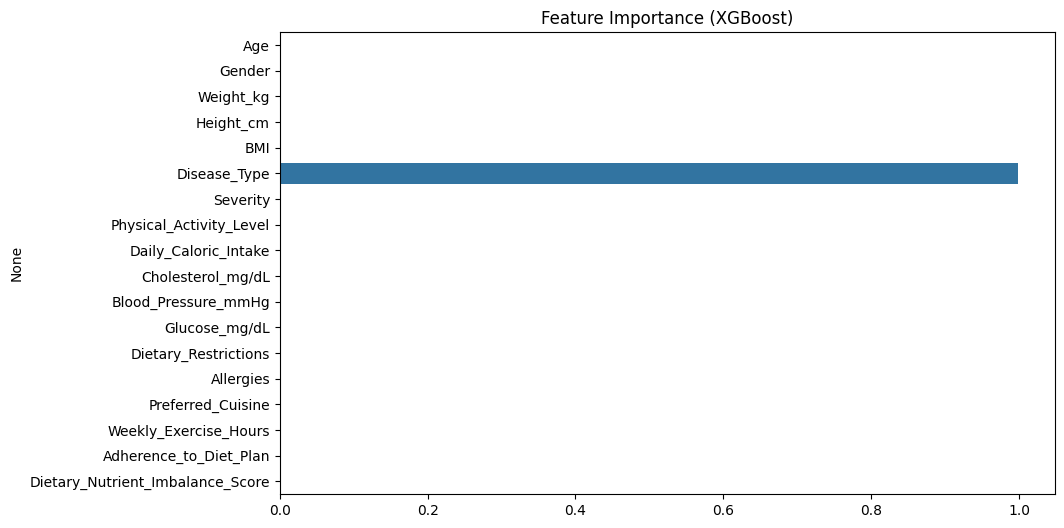

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = xgb.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (XGBoost)")
plt.show()

In [ ]:
sample = X.iloc[[0]]
sample_scaled = scaler.transform(sample)

prediction = xgb.predict(sample_scaled)
diet = diet_encoder.inverse_transform(prediction)

print("Predicted Diet Recommendation:", diet[0])

Predicted Diet Recommendation: Low_Carb


In [ ]:
def get_user_input():
    print("\nEnter Patient Details:\n")

    user_data = {
        "Age": int(input("Age: ")),
        "Gender": input("Gender (Male/Female/Other): "),
        "Weight_kg": float(input("Weight (kg): ")),
        "Height_cm": float(input("Height (cm): ")),
        "BMI": float(input("BMI: ")),
        "Disease_Type": input("Disease Type: "),
        "Severity": input("Severity (Low/Medium/High): "),
        "Physical_Activity_Level": input("Physical Activity Level (Low/Moderate/High): "),
        "Daily_Caloric_Intake": float(input("Daily Caloric Intake: ")),
        "Cholesterol_mg/dL": float(input("Cholesterol (mg/dL): ")),
        "Blood_Pressure_mmHg": float(input("Blood Pressure (mmHg): ")),
        "Glucose_mg/dL": float(input("Glucose (mg/dL): ")),
        "Dietary_Restrictions": input("Dietary Restrictions (None/Vegan/etc): "),
        "Allergies": input("Allergies (None/Nuts/etc): "),
        "Preferred_Cuisine": input("Preferred Cuisine: "),
        "Weekly_Exercise_Hours": float(input("Weekly Exercise Hours: ")),
        "Adherence_to_Diet_Plan": input("Adherence (Low/Medium/High): "),
        "Dietary_Nutrient_Imbalance_Score": float(input("Nutrient Imbalance Score: "))
    }

    return pd.DataFrame([user_data])

In [ ]:
def encode_user_input(user_df, label_encoders):
    for col in user_df.columns:
        if col in label_encoders:
            le = label_encoders[col]

            # Handle unseen categories safely
            if user_df.loc[0, col] not in le.classes_:
                # Assign a default class if the category is unseen
                user_df.loc[0, col] = le.classes_[0]

            # Transform the column using the fitted label encoder
            user_df.loc[0, col] = le.transform([user_df.loc[0, col]])[0]

    return user_df

In [ ]:
user_df = get_user_input()

user_df_encoded = encode_user_input(user_df, label_encoders)

user_scaled = scaler.transform(user_df_encoded)

prediction = xgb.predict(user_scaled)

diet_result = diet_encoder.inverse_transform(prediction)

print("\n🍽️ Recommended Diet Plan:", diet_result[0])


Enter Patient Details:

Age: 56
Gender (Male/Female/Other): Male
Weight (kg): 59
Height (cm): 162
BMI: 23
Disease Type: Obesity
Severity (Low/Medium/High): Moderate
Physical Activity Level (Low/Moderate/High): Low
Daily Caloric Intake: 3070
Cholesterol (mg/dL): 173
Blood Pressure (mmHg): 133
Glucose (mg/dL): 116.2
Dietary Restrictions (None/Vegan/etc): NaN
Allergies (None/Nuts/etc): Peanuts
Preferred Cuisine: Mexican
Weekly Exercise Hours: 3
Adherence (Low/Medium/High): Low
Nutrient Imbalance Score: 3

🍽️ Recommended Diet Plan: Balanced


In [ ]:
!pip install streamlit pyngrok

In [ ]:
import os

os.makedirs("/content/diet_app", exist_ok=True)

In [ ]:
import joblib

joblib.dump(xgb, "/content/diet_app/diet_model.pkl")
joblib.dump(scaler, "/content/diet_app/scaler.pkl")
joblib.dump(label_encoders, "/content/diet_app/label_encoders.pkl")
joblib.dump(diet_encoder, "/content/diet_app/diet_encoder.pkl")

['/content/diet_app/diet_encoder.pkl']